<a href="https://colab.research.google.com/github/rida-manzoor/GenAI/blob/main/3_1_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.9/399.9 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.0/378.0 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
  Attempting uninstall: msgpack
    Found existing installation: msgpack 1.0.8
    Uninstalling msgpack-1.0.8:
      Succes

In [2]:
pip install langsmith

In [3]:
pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.1 MB/s eta 0:00:00


In [4]:
## Environment secret key
from google.colab import userdata
groq_api_key = userdata.get('GROQ_API_KEY')


langsmith_api_key = userdata.get('LANGSMITH_API_KEY')

In [5]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith_api_key
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "CourseLanggraph"

In [8]:
from langchain_groq import ChatGroq

In [9]:
# Here we are using Gemma2 model, we can use any open source model that are avaliable on Groq

llm = ChatGroq(groq_api_key=groq_api_key, model_name='Gemma2-9b-It')
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7fdef064a3e0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7fdef0670220>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [10]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [11]:
from re import S
class State(TypedDict):
    # Messages that have the type list. the add_messages function
    # in the annotation defines how this state key should be updates
    messages:Annotated[list,add_messages]


graph_builder = StateGraph(State)

In [12]:
graph_builder

In [13]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [14]:
# Adding node on graph
graph_builder.add_node("chatbot",chatbot)

In [15]:
graph_builder

In [16]:
# Adding edges, Like it will first start and input will go to chatbot node(That we initialized ealier)
# From chatbot it will end as we are not using any other node/tool/
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [17]:
# Compiling
graph = graph_builder.compile()

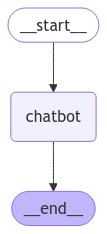

In [18]:
from IPython.display import display, Image
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except:
  pass

In [19]:
while True:
  user_input = input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Bye")
    break
  for event in graph.stream({'messages': ("user", user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print('Assistant:', value["messages"].content)

User: what are you doing
dict_values([{'messages': AIMessage(content='As a large language model, I don\'t "do" things in the way a human does. I don\'t have experiences or perform actions in the real world.\n\nRight now, I\'m waiting for your next request. I can process your questions and requests and generate text, translate languages, write different kinds of creative content, and answer your questions in an informative way.\n\nWhat can I do for you?\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 89, 'prompt_tokens': 13, 'total_tokens': 102, 'completion_time': 0.161818182, 'prompt_time': 0.000113759, 'queue_time': 0.014227420000000001, 'total_time': 0.161931941}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-10d58d97-fb44-483e-b7f1-ed029af37d1f-0', usage_metadata={'input_tokens': 13, 'output_tokens': 89, 'total_tokens': 102})}])
content='As a large language model, I don\'t "d